##Model suggestions from Dr. Bengfort 
1) Gradient Boosting – might want to try them
2) if svc is taking too long then recommend just using Stochastic Gradient Descent or Linear SVC - should improve the performance of the support vector machine and when you are working with support vector machine, make sure your trying polynomial kernels in addition to linear kernels
3) Multinomial naïve bayes if not normally distributed
4) Bayesian classifiers are going to perform the worst – this can be are baseline
5) Smote yellowbrick.target class balance
6) Filter down zero
7) parrell functions



!1) Gaussian Naïve Bayes if features are normally distributed
!2) stick with support vector machines and logistic regression to preserve the linearity of the features  in an understandable way (natural binary classifiers)
!3) Stick with support vector machines and logistic regression
!4) Don’t know if you would get good results from Random Forest and K Near Neighbors, 
!5) Ada boost

In [1]:
import pandas as pd
import boto3
from s3 import get_file

In [2]:
def data(data):
    df = pd.read_csv(data,sep='|')
    return df

In [3]:
s3 = boto3.resource('s3')

bucket = 's3ssp'

train_data = data(get_file(s3,bucket,download_file='Analysis_Data/master_train_playlist.csv',rename_file = 'master_train_playlist.csv'))
test_data = data(get_file(s3,bucket,download_file='Analysis_Data/test_ssp.csv',rename_file = 'test.csv'))


In [4]:
#Sort columns to be alphabetical order

df_train = train_data.reindex(sorted(train_data.columns), axis=1)
df_test = test_data.reindex(sorted(test_data.columns), axis=1)

In [5]:
df_train = df_train.drop(columns=['playlist','valence','danceability',
                                 'energy','acousticness',
                                 ])

df_test = df_test.drop(columns=['playlist','valence','danceability',
                      'energy','acousticness',
                               ])

## Pipeline

In [98]:
#Structure
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split as tts


#Kernal
from sklearn.gaussian_process.kernels import RBF


#Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Transform
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import FastICA
from sklearn import preprocessing

#Reports
from yellowbrick.classifier import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

models = [
    #Standard Scaler,QuantileTransformer random_state=0
    Pipeline([
            ('std',preprocessing.StandardScaler()),
            ('reg',LogisticRegression())
    ]),

    Pipeline([
            ('std',preprocessing.StandardScaler()),
            ('mlp',MLPClassifier())
    ]),

    
]

X = df_train[[col for col in df_train.columns if col != 'target']]

y = df_train['target']

X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)

In [99]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'reg__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag','saga'],
    'reg__penalty':['l1','l2', 'elasticnet', 'none',],
    'reg__C':[.5,1],
    'reg__fit_intercept':[True,False],
    'reg__intercept_scaling':[.5,1],
    
    #'mlp__solver':['lbfgs','sgd', 'adam']
}

for model in models:
    search = GridSearchCV(model, param_grid,cv=10)
    search.fit(X_train, y_train)
    print("Best parameter (CV score={x}".format(x=search.best_score_))
    #print("Best parameter (CV score=%):" % search.best_score_)
    print(search.best_params_)

    a = pd.DataFrame(search.cv_results_)
    break
    #_ = confusion_matrix(model, X_test, y_test,is_fitted=True)
    #y_pred = model.predict(X_train)
    #print('Model Score: ',model.score(X_train,y_train))
    #print('Accuracy Score: ',accuracy_score(y_train,y_pred))
    #print('F1 Score: ',f1_score(y_train,y_pred))
    #print('Precision Score: ', precision_score(y_train,y_pred))
    #print('Recall Score: ',recall_score(y_train,y_pred))

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 p

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' pen

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitF

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/Users/adamgoldstei

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFa

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solve

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/adamgoldstein/opt/anaconda3/lib/p

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/adamgoldstein/opt/anaconda3/lib/p

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  Fit

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=libli

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/adamgoldstein/opt/anaconda3/lib/p

In [93]:
a.sort_values(by='mean_test_score',ascending=False)
#[a['param_reg__solver']=='newton-cg']

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg__C,param_reg__fit_intercept,param_reg__intercept_scaling,param_reg__penalty,param_reg__solver,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
7,0.135860,0.007450,0.002561,0.000152,0.5,True,0.5,l2,liblinear,"{'reg__C': 0.5, 'reg__fit_intercept': True, 'r...",...,0.742614,0.735455,0.738523,0.74,0.737500,0.747386,0.744318,0.741250,0.003477,1
89,0.240676,0.025264,0.001959,0.000113,1,True,0.5,l2,saga,"{'reg__C': 1, 'reg__fit_intercept': True, 'reg...",...,0.742614,0.735455,0.738523,0.74,0.737386,0.747386,0.744318,0.741239,0.003475,2
27,0.124972,0.005130,0.002364,0.000149,0.5,True,1,l2,liblinear,"{'reg__C': 0.5, 'reg__fit_intercept': True, 'r...",...,0.742614,0.735455,0.738523,0.74,0.737386,0.747386,0.744318,0.741227,0.003480,3
87,0.135181,0.006551,0.002436,0.000072,1,True,0.5,l2,liblinear,"{'reg__C': 1, 'reg__fit_intercept': True, 'reg...",...,0.742614,0.735455,0.738523,0.74,0.737386,0.747386,0.744318,0.741227,0.003480,3
8,0.351145,0.023180,0.002195,0.000187,0.5,True,0.5,l2,sag,"{'reg__C': 0.5, 'reg__fit_intercept': True, 'r...",...,0.742614,0.735455,0.738523,0.74,0.737386,0.747386,0.744318,0.741227,0.003480,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.010101,0.000304,0.000000,0.000000,1,False,1,elasticnet,lbfgs,"{'reg__C': 1, 'reg__fit_intercept': False, 're...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112
152,0.010089,0.000327,0.000000,0.000000,1,False,1,elasticnet,liblinear,"{'reg__C': 1, 'reg__fit_intercept': False, 're...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111
153,0.009976,0.000082,0.000000,0.000000,1,False,1,elasticnet,sag,"{'reg__C': 1, 'reg__fit_intercept': False, 're...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110
154,0.010015,0.000107,0.000000,0.000000,1,False,1,elasticnet,saga,"{'reg__C': 1, 'reg__fit_intercept': False, 're...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109


/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


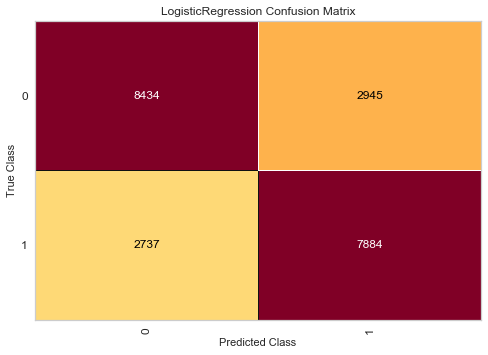

Model Score:  0.7425681818181818
Accuracy Score:  0.7425681818181818
F1 Score:  0.7345006211471299
Precision Score:  0.7313464186524145
Recall Score:  0.737682148826479


/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


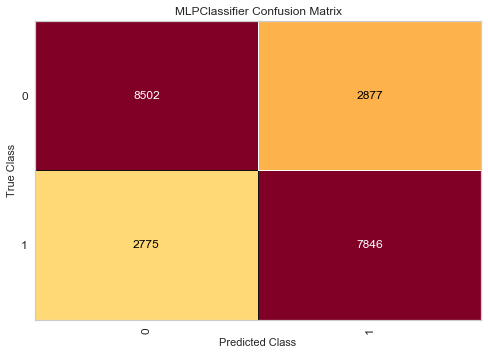

Model Score:  0.7448295454545455
Accuracy Score:  0.7448295454545455
F1 Score:  0.7354593970524134
Precision Score:  0.7361098009621734
Recall Score:  0.7348101414816733


In [8]:
models = [
    #Standard Scaler,QuantileTransformer random_state=0
    Pipeline([
            ('std',preprocessing.StandardScaler()),
            ('reg',LogisticRegression())
    ]),

    Pipeline([
            ('std',preprocessing.StandardScaler()),
            ('reg',MLPClassifier())
    ]),

    
]









#for model in models:
#    model.fit(X_train,y_train)
#    _ = confusion_matrix(model, X_test, y_test,is_fitted=True)
#    y_pred = model.predict(X_train)
#    print('Model Score: ',model.score(X_train,y_train))
#    print('Accuracy Score: ',accuracy_score(y_train,y_pred))
#    print('F1 Score: ',f1_score(y_train,y_pred))
#    print('Precision Score: ', precision_score(y_train,y_pred))
#    print('Recall Score: ',recall_score(y_train,y_pred))
    


#More complexity led to less precision
#Robust Scaler 
#Pipeline([
#        ('std',RobustScaler()),
#        ('reg',LogisticRegression())
#]),
#Pipeline([
#        ('std',RobustScaler()),
#        ('reg',RandomForestClassifier(n_estimators=50))
#]),



    
#Does identify positive more than comparison
#Pipeline([
#        ('std',StandardScaler()),
#        ('reg',RandomForestClassifier())
#]),
    
#Too many false positives and negatives    
#Pipeline([
#        ('std',StandardScaler()),
#        ('reg',AdaBoostClassifier())
#]),
#Robust Scaler leads to false positives above 3000


#Above 3000 for both false positives
#Pipeline([
#    ('std',StandardScaler()),
#    ('reg',KNeighborsClassifier())
#]),

#Pipeline([
#        ('std',StandardScaler()),
#        ('reg',DecisionTreeClassifier())
#]),

#Above 3000 on false positives

#Kills Kernal
#Pipeline([
#        ('std',StandardScaler()),
#        ('reg',GaussianProcessClassifier())
#]),

#Pipeline([
#        ('std',StandardScaler()),
#        ('reg',GaussianNB())
#]),
#Pipeline([
#        ('std',StandardScaler()),
#        ('reg',QuadraticDiscriminantAnalysis())
#]),





## Stop

## Logistical Regression

from sklearn.model_selection import cross_val_score,train_test_split
from yellowbrick.classifier import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix


X = df_train[[col for col in df_train.columns if col != 'target']]

y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X),y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

_ = confusion_matrix(model, X_test, y_test,is_fitted=True)


#confusion_matrix(X_train, y_train)


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from yellowbrick.classifier import confusion_matrix,classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score,train_test_split
from yellowbrick.classifier import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


X = df_train[[col for col in df_train.columns if col != 'target']]

y = df_train['target']

#Cross
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
print(clf.predict)






#confusion_matrix(logreg, X_train, y_train, X_test, y_test)


scores = cross_val_score(clf,X,y)

from sklearn.model_selection import cross_val_score,train_test_split
from yellowbrick.classifier import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler


X = df_train[[col for col in df_train.columns if col != 'target']]

y = df_train['target']
logreg = LogisticRegression()


#Cross
X_train, X_test, y_train, y_test = train_test_split(RobustScaler().fit_transform(X), y, test_size=0.2)
confusion_matrix(logreg, X_train, y_train, X_test, y_test)



from sklearn.pipeline import Pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.model_selection import cross_val_score,train_test_split
from yellowbrick.classifier import confusion_matrix,classification_report



#RandomForestRegressor(n_estimators = 50)



#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(X)
#enc.categories_


#Support Vector Machine
#estimator = svm.SVC(gamma=.001#,kernel='linear',C=100)

#confusion_matrix(estimator, *train_test_split(X, y, test_size=0.2))
#scores = cross_val_score(estimator,X,y)
#estimator.fit(X,y)
#estimator.predict(df_test)
#Cross value scores
#cross_val_score(X,y)


fromsklearn.neighborsimport KNeighborsClassifierfromsklearn.preprocessingimport StandardScalerfromsklearn.imputeimport SimpleImputerfromsklearn.pipelineimport Pipelinemodel = Pipeline([    ('impute', SimpleImputer(strategy='mean')),     ('scale', StandardScaler()),     ('knn', KNeighborsClassifier(n_neighbors=12))])# Update the hyperparameters of the modelmodel.set_params(knn__weights="distance")model.fit(X_train, y_train)model.score(X_test, y_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

model = Pipeline([('scale', StandardScaler()),
                    ('reg',LogisticRegression(fit_intercept=False))
                 ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
confusion_matrix(model.reg, X_train, y_train, X_test, y_test)

# Update the hyperparameters of the model



from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

#X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = [Pipeline([
    ('scale', StandardScaler()),
    ('reg'),LogisticRegression(fit_intercept=False)
    ]),
]

#check_is_fitted(model,['support_fit_','support_','support_vectors_'])

confusion_matrix(logreg, X_train, y_train, X_test, y_test)

model = Pipeline([
    ('std', StandardScaler()),
    ('reg'),RandomForestRegressor(n_estimator=50)
    ]),
    Pipeline([
    ('std', StandardScaler()),
    ('reg'),MLPRegressor(hidden_layer_sizes=(100,100,100))
    ]),
    Pipeline([
    ('std', RobustScaler()),
    ('reg'),LogisticRegression(fit_intercept=False)
    ]),
    Pipeline([
    ('std', RobustScaler()),
    ('reg'),RandomForestRegressor(n_estimator=50)
    ]),
    Pipeline([
    ('std', RobustScaler()),
    ('reg'),MLPRegressor(hidden_layer_sizes=(100,100,100))
    ]),